In [1]:
!pip install roboflow ultralytics -q


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="fBERkblbV6p4KqyYXXGj")
project = rf.workspace("newworkspace-tmqsj").project("kidney-tumor-detection-golwd-4cqov")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-Tumor-Detection-2 in yolov8:: 100%|██████████| 9804/9804 [00:29<00:00, 334.60it/s] 


WARNING ⚠️ user config directory '/root/.config/Ultralytics' is not writeable, defaulting to '/tmp' or CWD. Alternatively you can define a YOLO_CONFIG_DIR environment variable for this path.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/tmp/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="fBERkblbV6p4KqyYXXGj")
project = rf.workspace("newworkspace-tmqsj").project("kidney-stone-detection-grjvt-4r5xo")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-Stone-Detection-1 in yolov8:: 100%|██████████| 10132/10132 [00:40<00:00, 252.05it/s]


In [4]:
import os
import shutil

# Dataset yolları
datasets = [
    {
        "images_train": r"/workspace/Kidney-Tumor-Detection-2/train/images",
        "labels_train": r"/workspace/Kidney-Tumor-Detection-2/train/labels",
        "images_val": r"/workspace/Kidney-Tumor-Detection-2/valid/images",
        "labels_val": r"/workspace/Kidney-Tumor-Detection-2/valid/labels",
        "prefix": "ds1"
    },
    {
        "images_train": r"/workspace/Kidney-Stone-Detection-1/train/images",
        "labels_train": r"/workspace/Kidney-Stone-Detection-1/train/labels",
        "images_val": r"/workspace/Kidney-Stone-Detection-1/valid/images",
        "labels_val": r"/workspace/Kidney-Stone-Detection-1/valid/labels",
        "prefix": "ds2"
    }
]

# Merged dataset klasörleri
merged_train_images = "Kidney-Diagnosis/train/images"
merged_train_labels = "Kidney-Diagnosis/train/labels"
merged_val_images = "Kidney-Diagnosis/valid/images"
merged_val_labels = "Kidney-Diagnosis/valid/labels"

os.makedirs(merged_train_images, exist_ok=True)
os.makedirs(merged_train_labels, exist_ok=True)
os.makedirs(merged_val_images, exist_ok=True)
os.makedirs(merged_val_labels, exist_ok=True)

# Helper function: copy and rename
def copy_and_rename(src_images, src_labels, dest_images, dest_labels, prefix):
    for img_file in os.listdir(src_images):
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Image
        new_img_name = f"{prefix}_{img_file}"
        shutil.copy(os.path.join(src_images, img_file), os.path.join(dest_images, new_img_name))

        # Label
        lbl_file = img_file.rsplit('.', 1)[0] + ".txt"
        if os.path.exists(os.path.join(src_labels, lbl_file)):
            new_lbl_name = f"{prefix}_{lbl_file}"
            shutil.copy(os.path.join(src_labels, lbl_file), os.path.join(dest_labels, new_lbl_name))

# Tüm datasetleri birleştir
for ds in datasets:
    # Train
    copy_and_rename(ds["images_train"], ds["labels_train"], merged_train_images, merged_train_labels, ds["prefix"])
    # Validation
    copy_and_rename(ds["images_val"], ds["labels_val"], merged_val_images, merged_val_labels, ds["prefix"])

print("Birleştirme tamamlandı.")
print("Train görüntü sayısı:", len(os.listdir(merged_train_images)))
print("Validation görüntü sayısı:", len(os.listdir(merged_val_images)))

Birleştirme tamamlandı.
Train görüntü sayısı: 8706
Validation görüntü sayısı: 835


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(data="/workspace/Kidney-Diagnosis/data.yaml",
           epochs=45,
           imgsz=640,
           batch=32,
           lr0=0.01)

Ultralytics 8.3.193 🚀 Python-3.11.11 torch-2.8.0.dev20250319+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32120MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/Kidney-Diagnosis/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x75b6ca4e5490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
model = YOLO("/workspace/runs/detect/train/weights/best.pt")
img_path = "/workspace/Kidney-Stone-Detection-1/test/images/1-3-46-670589-33-1-63705534437778071900001-4889285351602499583_png_jpg.rf.81d336749adb9b5a2743a66a216d964a.jpg"
result = model(img_path, save=True)


image 1/1 /workspace/Kidney-Stone-Detection-1/test/images/1-3-46-670589-33-1-63705534437778071900001-4889285351602499583_png_jpg.rf.81d336749adb9b5a2743a66a216d964a.jpg: 640x640 6 stones, 2.9ms
Speed: 0.7ms preprocess, 2.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /workspace/runs/detect/predict


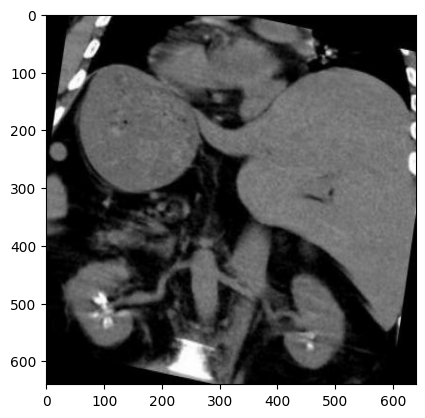

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

img_path = "/workspace/Kidney-Stone-Detection-1/test/images/1-3-46-670589-33-1-63705534437778071900001-4889285351602499583_png_jpg.rf.81d336749adb9b5a2743a66a216d964a.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.show()



image 1/1 /workspace/Kidney-Tumor-Detection-2/test/images/Tumor-240-_jpg.rf.07003ffeb37e4e5390ff58281d24f9b5.jpg: 640x640 1 stone, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /workspace/runs/detect/predict3


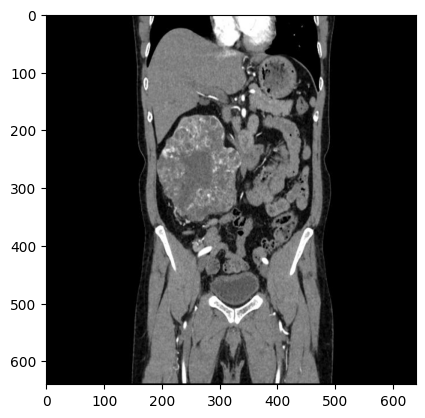

In [16]:
model = YOLO("/workspace/runs/detect/train/weights/best.pt")
img_path = "/workspace/Kidney-Tumor-Detection-2/test/images/Tumor-240-_jpg.rf.07003ffeb37e4e5390ff58281d24f9b5.jpg"
result = model(img_path, save=True, show=True)


%matplotlib inline
import matplotlib.pyplot as plt

img_path = "/workspace/Kidney-Tumor-Detection-2/test/images/Tumor-240-_jpg.rf.07003ffeb37e4e5390ff58281d24f9b5.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.show()


In [18]:
data_path = "/workspace/Kidney-Diagnosis/train/images/"
listed=os.listdir(data_path)
print(listed)

['ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.12dee4db035018434393772408613f73.jpg', 'ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.6e5c7027926e2211ea1bfd6b9f940b0c.jpg', 'ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.8257bb93208a1fdcdf44b2067be5c9ff.jpg', 'ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.826443aacb6236346080a46d4c5c3954.jpg', 'ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.8848baddbe4696cb0f08c2278c80a87a.jpg', 'ds2_1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.f978ea1724be9aba0dff8c41f7b575c1.jpg', 'ds2_1-3-46-670589-33-1-63700700750059521800001-5070347181582747136_png_jpg.rf.30aa370e6bacf452add482399a62b6f7.jpg', 'ds2_1-3-46-670589-33-1-63700700750059521800001-5070347181582747136_png_jpg.rf.39a882f1af76706fabdb687fb6ebd7a1.jpg', 'ds2_1-3-46-670589-33-1-63700700750059521800001-5070347